# CSE 158, Fall 2019: Homework 2

**Name:** CUI, HONGJIAN &ensp;&ensp;&ensp;&ensp; **PID:** U08398995 

## Tasks - Diagnostics:

### 1. Read data and train a logistic regressor with regularization coefficient C = 1.0. 
Report the accuracy and Balanced Error Rate (BER) of your classifier.

In [1]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
path = "/home/cui/Projects/PycharmProjects/CSE-158/data/5year.arff"
file = open(path, 'r')

In [3]:
while not '@data' in file.readline():
    pass

In [4]:
dataset = []
for l in file:
    if '?' in l:
        continue
    l = l.split(',')
    values = [1] + [float(x) for x in l]
    values[-1] = values[-1] > 0
    dataset.append(values)

In [5]:
X = [d[:-1] for d in dataset]
y = [d[-1] for d in dataset]

In [6]:
model = linear_model.LogisticRegression(solver='lbfgs', C=1.0)

In [7]:
model.fit(X, y)

/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
prediction = model.predict(X)

In [9]:
def evaluateClassifier(prediction, y):
    TP_ = np.logical_and(prediction, y)
    FP_ = np.logical_and(prediction, np.logical_not(y))
    TN_ = np.logical_and(np.logical_not(prediction), np.logical_not(y))
    FN_ = np.logical_and(np.logical_not(prediction), y)
    
    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)
    
    return TP, FP, TN, FN

In [10]:
TP, FP, TN, FN = evaluateClassifier(prediction, y)

In [11]:
def accuracy(TP, FP, TN, FN):
    return (TP + TN) / (TP + FP + TN + FN)

In [12]:
accuracy(TP, FP, TN, FN)

0.9656878917848895

In [13]:
def BER(TP, FP, TN, FN):
    return 0.5 * (FN / (TP + FN) + FP / (TN + FP))

In [14]:
BER(TP, FP, TN, FN)

0.47668514315934635

### 2. Retrain the above model using the class_weight='balanced' option. 
Report the accuracy and BER of your new classifier.

In [15]:
model = linear_model.LogisticRegression(solver='lbfgs', 
                                        C=1.0, class_weight='balanced')

In [16]:
model.fit(X, y)

/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
prediction = model.predict(X)

In [18]:
TP, FP, TN, FN = evaluateClassifier(prediction, y)

In [19]:
accuracy(TP, FP, TN, FN)

0.6951501154734411

In [20]:
BER(TP, FP, TN, FN)

0.30440189049330896

### 3. Shuffle the data, and split it into training, validation, and test splits, with a 50/25/25% ratio. 
Using the class_weight='balanced' option, and training on the training set, report the training / validation / test accuracy and BER.

In [21]:
Xy = list(zip(X, y))

In [22]:
random.shuffle(Xy)

In [23]:
X = [d[0] for d in Xy]
y = [d[1] for d in Xy]

In [24]:
n = np.size(y)
split_1 = int(n * 0.5)
split_2 = int(n * 0.25 + split_1)

In [25]:
X_train = X[:split_1]
X_valid = X[split_1:split_2]
X_test = X[split_2:]
y_train = y[:split_1]
y_valid = y[split_1:split_2]
y_test = y[split_2:]

In [26]:
model = linear_model.LogisticRegression(solver='lbfgs', 
                                        C=1.0, class_weight='balanced')

In [27]:
model.fit(X_train, y_train)

/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Training Set**

In [28]:
prediction_train = model.predict(X_train)

In [29]:
TP, FP, TN, FN = evaluateClassifier(prediction_train, y_train)

In [30]:
accuracy(TP, FP, TN, FN)

0.6765676567656765

In [31]:
BER(TP, FP, TN, FN)

0.2633898305084746

**Validation Set**

In [32]:
prediction_valid = model.predict(X_valid)

In [33]:
TP, FP, TN, FN = evaluateClassifier(prediction_valid, y_valid)

In [34]:
accuracy(TP, FP, TN, FN)

0.6922060766182299

In [35]:
BER(TP, FP, TN, FN)

0.34332945134575565

**Test Set**

In [36]:
prediction_test = model.predict(X_test)

In [37]:
TP, FP, TN, FN = evaluateClassifier(prediction_test, y_test)

In [38]:
accuracy(TP, FP, TN, FN)

0.6930171277997365

In [39]:
BER(TP, FP, TN, FN)

0.2772436986208302

### 4. Implement a complete regularization pipeline.
Consider values of C in the range {10−4, 10−3, . . . , 103, 104}.Report (or plot) the train, validation, and test BER for each value of C. Based on these values, which classifier would you select (in terms of generalization performance) and why?

In [40]:
C = [10**i for i in range(-4, 5)]
BER_train, BER_valid, BER_test = [], [], []

In [41]:
for c in C:
    model = linear_model.LogisticRegression(solver='lbfgs', 
                                            C=c, class_weight='balanced')
    model.fit(X_train, y_train)
    
    prediction_train = model.predict(X_train)
    TP, FP, TN, FN = evaluateClassifier(prediction_train, y_train)
    BER_train.append(BER(TP, FP, TN, FN))
    
    prediction_valid = model.predict(X_valid)
    TP, FP, TN, FN = evaluateClassifier(prediction_valid, y_valid)
    BER_valid.append(BER(TP, FP, TN, FN))
    
    prediction_test = model.predict(X_test)
    TP, FP, TN, FN = evaluateClassifier(prediction_test, y_test)
    BER_test.append(BER(TP, FP, TN, FN))

/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of

In [42]:
BER_train, BER_valid, BER_test

([0.27521186440677964,
  0.27084745762711865,
  0.2694491525423729,
  0.2394915254237288,
  0.2633898305084746,
  0.26305084745762713,
  0.26305084745762713,
  0.26440677966101694,
  0.27521186440677964],
 [0.34332945134575565,
  0.34604684265010355,
  0.3127264492753623,
  0.29228131469979296,
  0.34332945134575565,
  0.34265010351966874,
  0.34265010351966874,
  0.34332945134575565,
  0.34197075569358176],
 [0.2758509409606631,
  0.28072559277124803,
  0.26610163733949316,
  0.26085331883959506,
  0.2772436986208302,
  0.2772436986208302,
  0.27654731979074665,
  0.2772436986208302,
  0.27654731979074665])

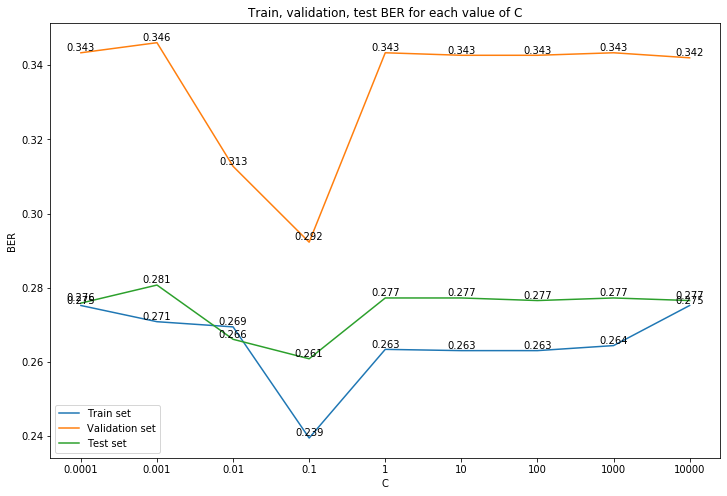

In [43]:
plt.figure(figsize=(12,8))
x_axis = [10000 / len(C) * C.index(x) for x in C]

plt.plot(x_axis, BER_train, label='Train set')
plt.plot(x_axis, BER_valid, label='Validation set')
plt.plot(x_axis, BER_test, label='Test set')

# Processing the plot
plt.xticks(x_axis, [str(c) for c in C])
for a, b in zip(x_axis, BER_train):
    plt.text(a, b, "%.3f" % b, ha='center', va='bottom', fontsize=10)
for a, b in zip(x_axis, BER_valid):
    plt.text(a, b, "%.3f" % b, ha='center', va='bottom', fontsize=10)
for a, b in zip(x_axis, BER_test):
    plt.text(a, b, "%.3f" % b, ha='center', va='bottom', fontsize=10)

plt.title("Train, validation, test BER for each value of C")
plt.xlabel("C")
plt.ylabel("BER")
plt.legend()
plt.show()

Based on these values, I will select the classifier which C is 0.1.
The reason why I choose this C is that we can see the BER of each C, when C = 0.1, the train, validation and test set of BER are the lowest, which means the accuracy of this model is high.

### 5. Comput the $F_\beta$ scores for $\beta=1, \beta=0.1, \beta=10$ for the above classifier, using C = 1 (on the test set).

In [44]:
model = linear_model.LogisticRegression(solver='lbfgs', 
                                        C=1.0, class_weight='balanced')

In [45]:
model.fit(X_train, y_train)

/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
prediction_test = model.predict(X_test)
TP, FP, TN, FN = evaluateClassifier(prediction_test, y_test)

In [47]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)

In [48]:
def F_score(precision, recall, beta):
    return (1 + beta**2) * (precision * recall) 
                        / (beta ** 2 * precision + recall)

**$\beta = 0.1$**

In [49]:
F_score(precision, recall, 0.1)

0.12306906175071736

**$\beta = 1$**

In [50]:
F_score(precision, recall, 1)

0.21016949152542375

**$\beta = 10$**

In [51]:
F_score(precision, recall, 10)

0.7191088654111163

## Tasks - Dimensionality Reduction:

### 7. Compute the PCA basis on the training set. Report the first PCA component.

In [52]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components=5)

In [54]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
print(pca.components_[0])

[ 8.06368818e-26  9.70476012e-08 -3.69821440e-07  1.02656604e-06
  4.89745625e-06  1.34942085e-03  4.93170366e-08  8.35697514e-07
  5.47241014e-06 -5.96020830e-07  4.22958437e-07  2.05459297e-07
  1.21170024e-06 -2.30731379e-06  8.35527381e-07 -1.62911250e-03
  1.05785352e-06  5.96551609e-06  7.72995795e-07  3.91015428e-07
  3.98561127e-05 -5.99412826e-06  1.83216244e-07  3.54088185e-07
  6.30842823e-07  8.68448238e-07  9.37757750e-07 -3.45047221e-05
  1.57866730e-05  3.32465325e-06 -1.46945516e-06  3.74894515e-07
 -4.36544058e-04  4.28529164e-06 -1.59760488e-06  1.59698599e-07
 -8.68508559e-07 -1.58176832e-03  1.76769329e-07  1.91438109e-07
  2.27276272e-06 -1.16054959e-06  2.70851120e-07  5.89735234e-05
  1.91161378e-05 -1.43715558e-06  3.63368696e-06 -1.59272504e-04
  2.27176022e-07  3.53134739e-07  4.10151962e-06 -7.50699312e-07
 -1.17035208e-06 -7.25503284e-07  1.57717870e-05  9.99996365e-01
  2.00525477e-07  1.31817918e-07 -2.65684695e-07 -8.44226826e-08
 -1.15381299e-04 -8.55290

### 8. Train a model using a low-dimensional feature vector.
Compute the validation and test BER of a model that uses just the first N components for N = 5, 10, ..., 30. Again use class_weight='balanced' and C = 1.0.

In [56]:
BER_valid, BER_test = [], []

In [57]:
for n in range(5,35,5):
    pca = PCA(n_components=n)
    pca.fit(X)
    
    Xpca_train = np.matmul(X_train, pca.components_.T)
    Xpca_valid = np.matmul(X_valid, pca.components_.T)
    Xpca_test = np.matmul(X_test, pca.components_.T)
    
    model = linear_model.LogisticRegression(solver='lbfgs', C=1.0, class_weight='balanced')
    model.fit(Xpca_train, y_train)
    
    prediction_valid = model.predict(Xpca_valid)
    TP, FP, TN, FN = evaluateClassifier(prediction_valid, y_valid)
    BER_valid.append(BER(TP, FP, TN, FN))
    
    prediction_test = model.predict(Xpca_test)
    TP, FP, TN, FN = evaluateClassifier(prediction_test, y_test)
    BER_test.append(BER(TP, FP, TN, FN))

/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of

In [58]:
for n in range(5, 35, 5):
    print("The validation BER of the model uses first {0} components is {1:.4f}.".format(n, BER_valid[int(n / 5 - 1)]))

for n in range(5, 35, 5):
    print("The test BER of the model uses first {0} components is {1:.4f}.".format(n, BER_test[int(n / 5 - 1)]))

The validation BER of the model uses first 5 components is 0.3930.
The validation BER of the model uses first 10 components is 0.4148.
The validation BER of the model uses first 15 components is 0.3678.
The validation BER of the model uses first 20 components is 0.3494.
The validation BER of the model uses first 25 components is 0.3916.
The validation BER of the model uses first 30 components is 0.3399.
The test BER of the model uses first 5 components is 0.2891.
The test BER of the model uses first 10 components is 0.3295.
The test BER of the model uses first 15 components is 0.2779.
The test BER of the model uses first 20 components is 0.2856.
The test BER of the model uses first 25 components is 0.2793.
The test BER of the model uses first 30 components is 0.2759.
